# **SVM**

## Exploring the Dataset:

In [1]:
import pandas as pd

df = pd.read_csv("final_cleaned_oscars.csv")
df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.8,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2


 ## Data Preprocessing (Label Encoding and Selection)

In [2]:
from sklearn.preprocessing import LabelEncoder

features = ['Popularity', 'Vote_Average', 'IMDb_Rating']
label = 'Winner'

X = df[features]
y = df[label].astype(int)

X = X.dropna()
y = y.loc[X.index]

In [14]:
print("Feature Data (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Feature Data (X):
   Popularity  Vote_Average  IMDb_Rating
0         6.8           6.8          7.2
1        46.0           8.0          8.2
2        46.0           8.0          8.2
3        46.0           8.0          8.2
4        46.0           8.0          8.2

Target Variable (y):
0    0
1    1
2    0
3    0
4    0
Name: Winner, dtype: int64


## Splitting into Training and Testing Sets:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
X_train.head(10)

,Popularity,Vote_Average,IMDb_Rating
2085,7.2,7.2,7.3
2513,73.7,8.2,8.6
354,27.2,7.3,7.7
3185,112.6,8.6,9.0
552,23.9,7.5,7.8
3942,4.5,6.5,7.0
1876,36.4,7.6,7.8
379,10.2,6.8,7.3
3773,1.3,4.8,6.7
641,12.8,6.3,6.8


In [5]:
y_train.head(10)

,Winner
2085,1
2513,0
354,1
3185,1
552,0
3942,0
1876,1
379,0
3773,0
641,0


## Applying SMOTE

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Original y_train distribution:", Counter(y_train))
print("Balanced y_train_bal distribution:", Counter(y_train_bal))

Original y_train distribution: Counter({0: 2659, 1: 635})
Balanced y_train_bal distribution: Counter({1: 2659, 0: 2659})


In [7]:
X_train_bal.head(10)

,Popularity,Vote_Average,IMDb_Rating
0,7.2,7.2,7.3
1,73.7,8.2,8.6
2,27.2,7.3,7.7
3,112.6,8.6,9.0
4,23.9,7.5,7.8
5,4.5,6.5,7.0
6,36.4,7.6,7.8
7,10.2,6.8,7.3
8,1.3,4.8,6.7
9,12.8,6.3,6.8


In [8]:
y_train_bal.head(10)

,Winner
0,1
1,0
2,1
3,1
4,0
5,0
6,1
7,0
8,0
9,0


## Saving the datasets

In [9]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

X_train_bal.to_csv("X_train_balanced.csv", index=False)
y_train_bal.to_csv("y_train_balanced.csv", index=False)

## **SVM Classifiers for Different Kernels and C Values**

Kernel: linear, C: 0.1
              precision    recall  f1-score   support

           0       0.87      0.48      0.62       665
           1       0.24      0.69      0.36       159

    accuracy                           0.52       824
   macro avg       0.55      0.58      0.49       824
weighted avg       0.74      0.52      0.57       824



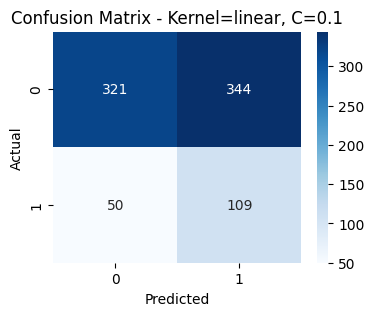

Kernel: linear, C: 1
              precision    recall  f1-score   support

           0       0.87      0.48      0.62       665
           1       0.24      0.69      0.36       159

    accuracy                           0.52       824
   macro avg       0.55      0.58      0.49       824
weighted avg       0.74      0.52      0.57       824



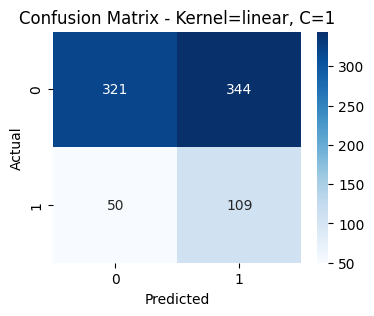

Kernel: linear, C: 10
              precision    recall  f1-score   support

           0       0.87      0.48      0.61       665
           1       0.24      0.69      0.36       159

    accuracy                           0.52       824
   macro avg       0.55      0.58      0.48       824
weighted avg       0.74      0.52      0.56       824



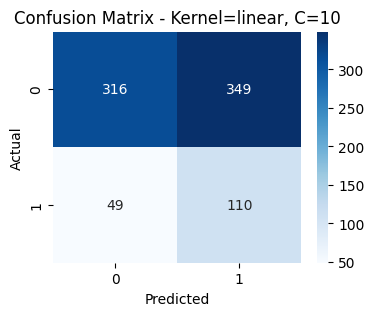

Kernel: poly, C: 0.1
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       665
           1       0.25      0.08      0.12       159

    accuracy                           0.78       824
   macro avg       0.53      0.51      0.50       824
weighted avg       0.70      0.78      0.73       824



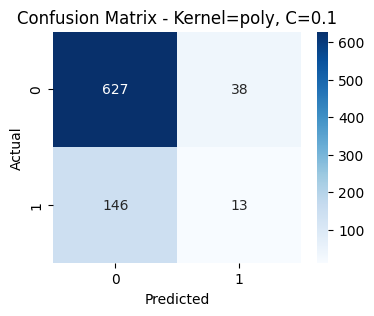

Kernel: poly, C: 1
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       665
           1       0.22      0.12      0.16       159

    accuracy                           0.75       824
   macro avg       0.52      0.51      0.50       824
weighted avg       0.70      0.75      0.72       824



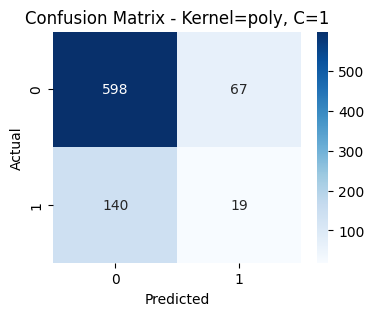

Kernel: poly, C: 10
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       665
           1       0.25      0.18      0.21       159

    accuracy                           0.74       824
   macro avg       0.53      0.52      0.52       824
weighted avg       0.71      0.74      0.72       824



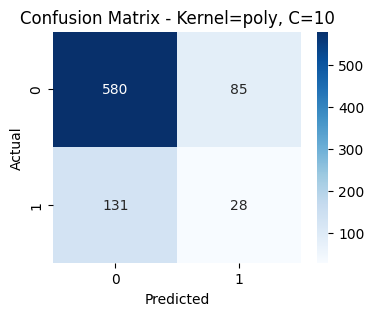

Kernel: rbf, C: 0.1
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       665
           1       0.27      0.59      0.37       159

    accuracy                           0.61       824
   macro avg       0.57      0.60      0.54       824
weighted avg       0.75      0.61      0.65       824



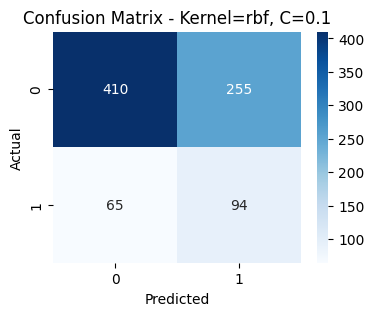

Kernel: rbf, C: 1
              precision    recall  f1-score   support

           0       0.88      0.47      0.61       665
           1       0.25      0.72      0.37       159

    accuracy                           0.52       824
   macro avg       0.56      0.60      0.49       824
weighted avg       0.75      0.52      0.56       824



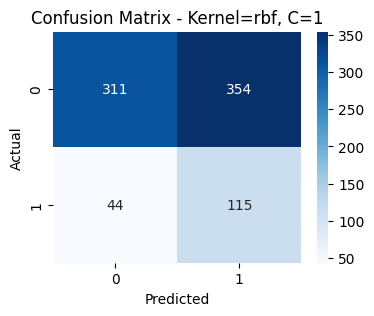

Kernel: rbf, C: 10
              precision    recall  f1-score   support

           0       0.88      0.45      0.59       665
           1       0.25      0.75      0.37       159

    accuracy                           0.51       824
   macro avg       0.57      0.60      0.48       824
weighted avg       0.76      0.51      0.55       824



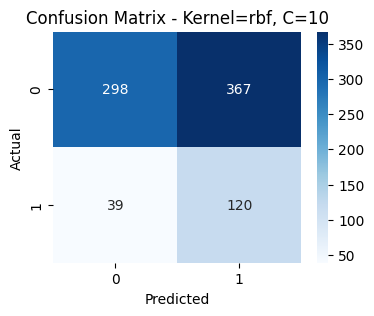

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

results = []

for kernel in kernels:
    for C_val in C_values:
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=3, C=C_val, random_state=42)
        else:
            model = SVC(kernel=kernel, C=C_val, random_state=42)

        model.fit(X_train_bal, y_train_bal)
        preds = model.predict(X_test)

        acc = model.score(X_test, y_test)
        cm = confusion_matrix(y_test, preds)
        report = classification_report(y_test, preds, output_dict=True)

        results.append({
            'Kernel': kernel,
            'C': C_val,
            'Accuracy': acc,
            'F1-Score (Class 0)': report['0']['f1-score'],
            'F1-Score (Class 1)': report['1']['f1-score']
        })

        print(f"Kernel: {kernel}, C: {C_val}")
        print(classification_report(y_test, preds))
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix - Kernel={kernel}, C={C_val}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

## **Decision Boundary Plots (Best Models per Kernel)**

In [11]:
def plot_decision_boundary(X, y, model, title):
    from matplotlib.colors import ListedColormap
    import matplotlib.pyplot as plt
    import numpy as np

    h = 0.1  # Faster: increase grid step size (was 0.02)

    X = X[['Popularity', 'Vote_Average']].values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.7, cmap=ListedColormap(('lightblue', 'salmon')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('blue', 'red')), s=25)
    plt.title(title)
    plt.xlabel('Popularity')
    plt.ylabel('Vote_Average')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


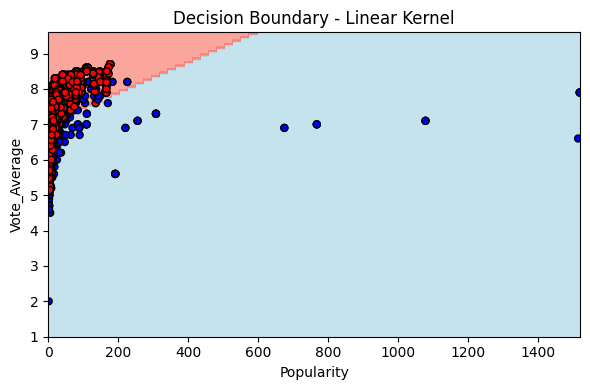

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


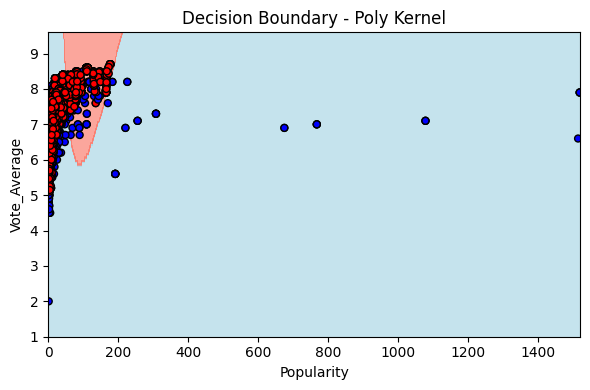

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


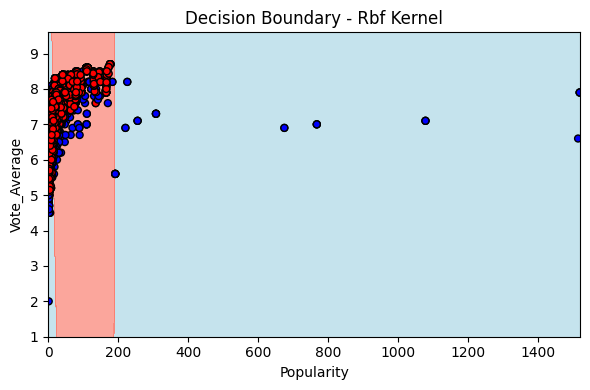

In [12]:
from sklearn.svm import SVC

best_models = {
    'linear': SVC(kernel='linear', C=1, random_state=42),
    'poly': SVC(kernel='poly', degree=3, C=1, random_state=42),
    'rbf': SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
}

X_small = X_train_bal[['Popularity', 'Vote_Average']]
y_small = y_train_bal

for kernel_name, model in best_models.items():
    model.fit(X_small, y_small)
    plot_decision_boundary(X_small, y_small, model, f"Decision Boundary - {kernel_name.capitalize()} Kernel")

## **Comparison Table**

In [13]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

results_df.to_csv("svm_kernel_comparison.csv", index=False)

   Kernel     C  Accuracy  F1-Score (Class 0)  F1-Score (Class 1)
0  linear   0.1  0.521845            0.619691            0.356209
1  linear   1.0  0.521845            0.619691            0.356209
2  linear  10.0  0.516990            0.613592            0.355987
3    poly   0.1  0.776699            0.872045            0.123810
4    poly   1.0  0.748786            0.852459            0.155102
5    poly  10.0  0.737864            0.843023            0.205882
6     rbf   0.1  0.611650            0.719298            0.370079
7     rbf   1.0  0.516990            0.609804            0.366242
8     rbf  10.0  0.507282            0.594810            0.371517


## **Visualizing the Results**

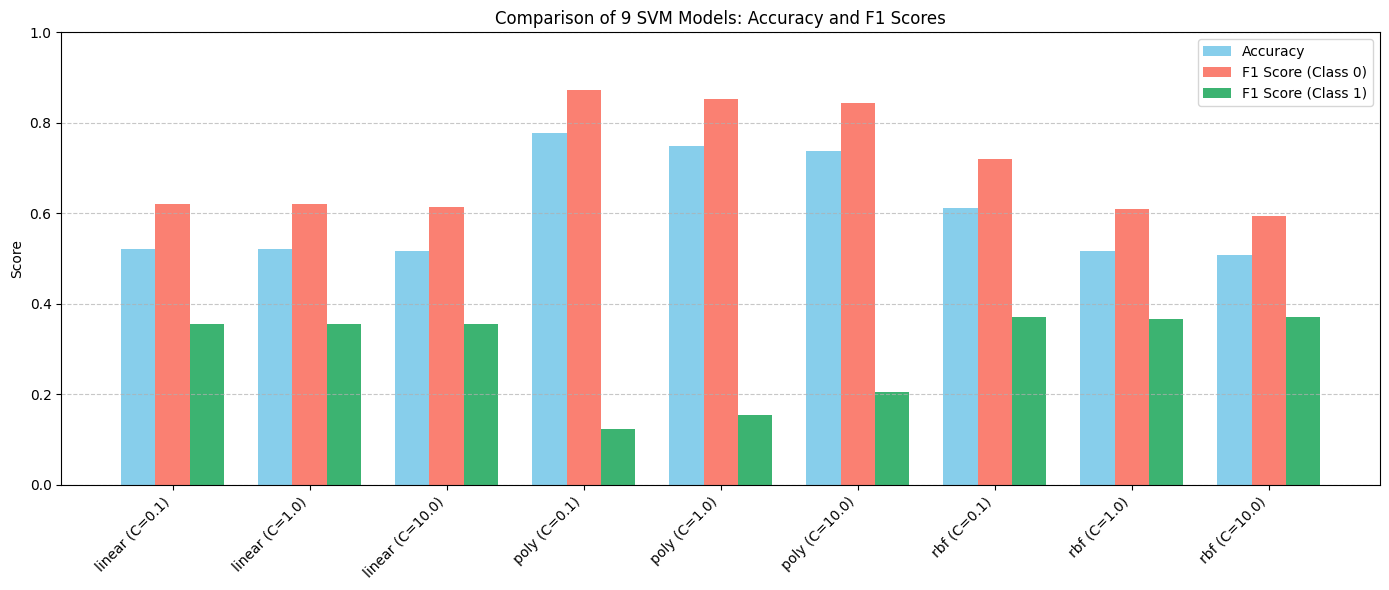

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

results_df = pd.DataFrame(results)

kernel_labels = results_df['Kernel'] + " (C=" + results_df['C'].astype(str) + ")"

x = np.arange(len(kernel_labels))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, results_df['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x, results_df['F1-Score (Class 0)'], width, label='F1 Score (Class 0)', color='salmon')
plt.bar(x + width, results_df['F1-Score (Class 1)'], width, label='F1 Score (Class 1)', color='mediumseagreen')

plt.xticks(x, kernel_labels, rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparison of 9 SVM Models: Accuracy and F1 Scores")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()